# Fashionpedia Data Demo
ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [1]:
%matplotlib inline

import numpy as np
import os
import sys

from fashionpedia.fp import Fashionpedia

In [2]:
dir_pth = "/local/scratch/jihyung/comp_imgs/dataset/fashionpedia/"
split = "val"
anno_file = os.path.join(dir_pth, f"instances_attributes_{split}2020.json")

if split == "val":
    img_root = os.path.join(dir_pth, "test")
    comp_adjs = ["asymmetrical", "symmetrical", "straight", "baggy", "oversized",
                 "curved (fit)", "tight (fit)", "regular (fit)", "loose (fit)", "micro (length)", 
                 "mini (length)", "maxi (length)", "short (length)", "asymmetric (collar)", "regular (collar)", 
                 "oversized (collar)", "oversized (lapel)", "asymmetric (neckline)", "round (neck)", "oval (neck)",
                 "square (neckline)", "plunging (neckline)", "curved (pocket)", "washed", "distressed", 
                 "embossed", "frayed", "ruched", "quilted", "tiered", 
                 "slit", "perforated", "plain (pattern)", "abstract", "floral",
                 "geometric", "paisley", "argyle"
    ]
else:
    img_root = os.path.join(dir_pth, split)

In [3]:
# initialize Fashionpedia api
fp = Fashionpedia(anno_file)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading attributes...
attributes index created!


In [4]:
# # Display the categories and attributes.
# # Pls refer to the final data for the final version of categories and attributes
# cats = fp.loadCats(fp.getCatIds())
# cat_names =[cat['name'] for cat in cats]
# print('Fashionpedia categories: \n{}\n'.format('; '.join(cat_names)))

# atts = fp.loadAttrs(fp.getAttIds())
# att_names = [att["name"] for att in atts]
# print('Fashionpedia attributes (first 10): \n{}\n'.format('; '.join(att_names[:10])))
# print(f'Fashionpedia attributes: \n{len(att_names)}\n')



In [9]:
# different ways to get image id:
# option 1: get all images containing given categories, and/or given attributes, 
#    select one at random


# Images by category ids
#cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
#img_ids = fp.getImgIds(catIds=cat_ids)
#selected = img_ids[np.random.randint(0, len(img_ids))]

# Images by category_attribute ids
cats = fp.loadCats(fp.getCatIds())
cat_names =[cat['name'] for cat in cats]
#cat_ids = fp.getCatIds(catNms=['pants','sleeve'])
cat_ids = fp.getCatIds(catNms=cat_names)
#att_ids = fp.getAttIds(attNms=['regular (collar)'])
att_ids = fp.getAttIds(attNms=comp_adjs)

cnt = 0
for cat_id in cat_ids:
    for att_id in att_ids:
        #img_ids = fp.getImgIds(catIds=cat_id, attIds=att_id)
        cat_att_id = f"{cat_id}_{att_id}"
        img_ids = fp.getImgIds(catAttId=cat_att_id)
        if len(img_ids) != 0:
            cnt+=1

print("cnt: ", cnt)
# option 2: get image id randomly from the the anno_file
#img_ids = sorted(fp.getImgIds())
#selected = img_ids[np.random.randint(0, len(img_ids))]
#print(selected)

cnt:  190


Segmentation 0:
	Category: shoe
Segmentation 1:
	Category: shoe
Segmentation 2:
	Category: pants
	Attribtues:
		316: no special manufacturing technique
		317: plain (pattern)
		295: no non-textile material
		136: regular (fit)
		230: fly (opening)
		154: maxi (length)
		115: symmetrical
		128: straight
Segmentation 3:
	Category: dress
	Attribtues:
		317: plain (pattern)
		129: a-line
		295: no non-textile material
		109: sweater (dress)
		114: asymmetrical
		149: mini (length)
		229: zip-up
Segmentation 4:
	Category: neckline
	Attribtues:
		190: scoop (neck)
Segmentation 5:
	Category: lapel
	Attribtues:
		174: notched (lapel)
Segmentation 6:
	Category: jacket
	Attribtues:
		317: plain (pattern)
		17: blazer
		142: normal waist
		316: no special manufacturing technique
		146: above-the-hip (length)
		295: no non-textile material
		135: tight (fit)
		114: asymmetrical
		225: single breasted
Segmentation 7:
	Category: sleeve
	Attribtues:
		160: wrist-length
		204: set-in sleeve
Segmentati

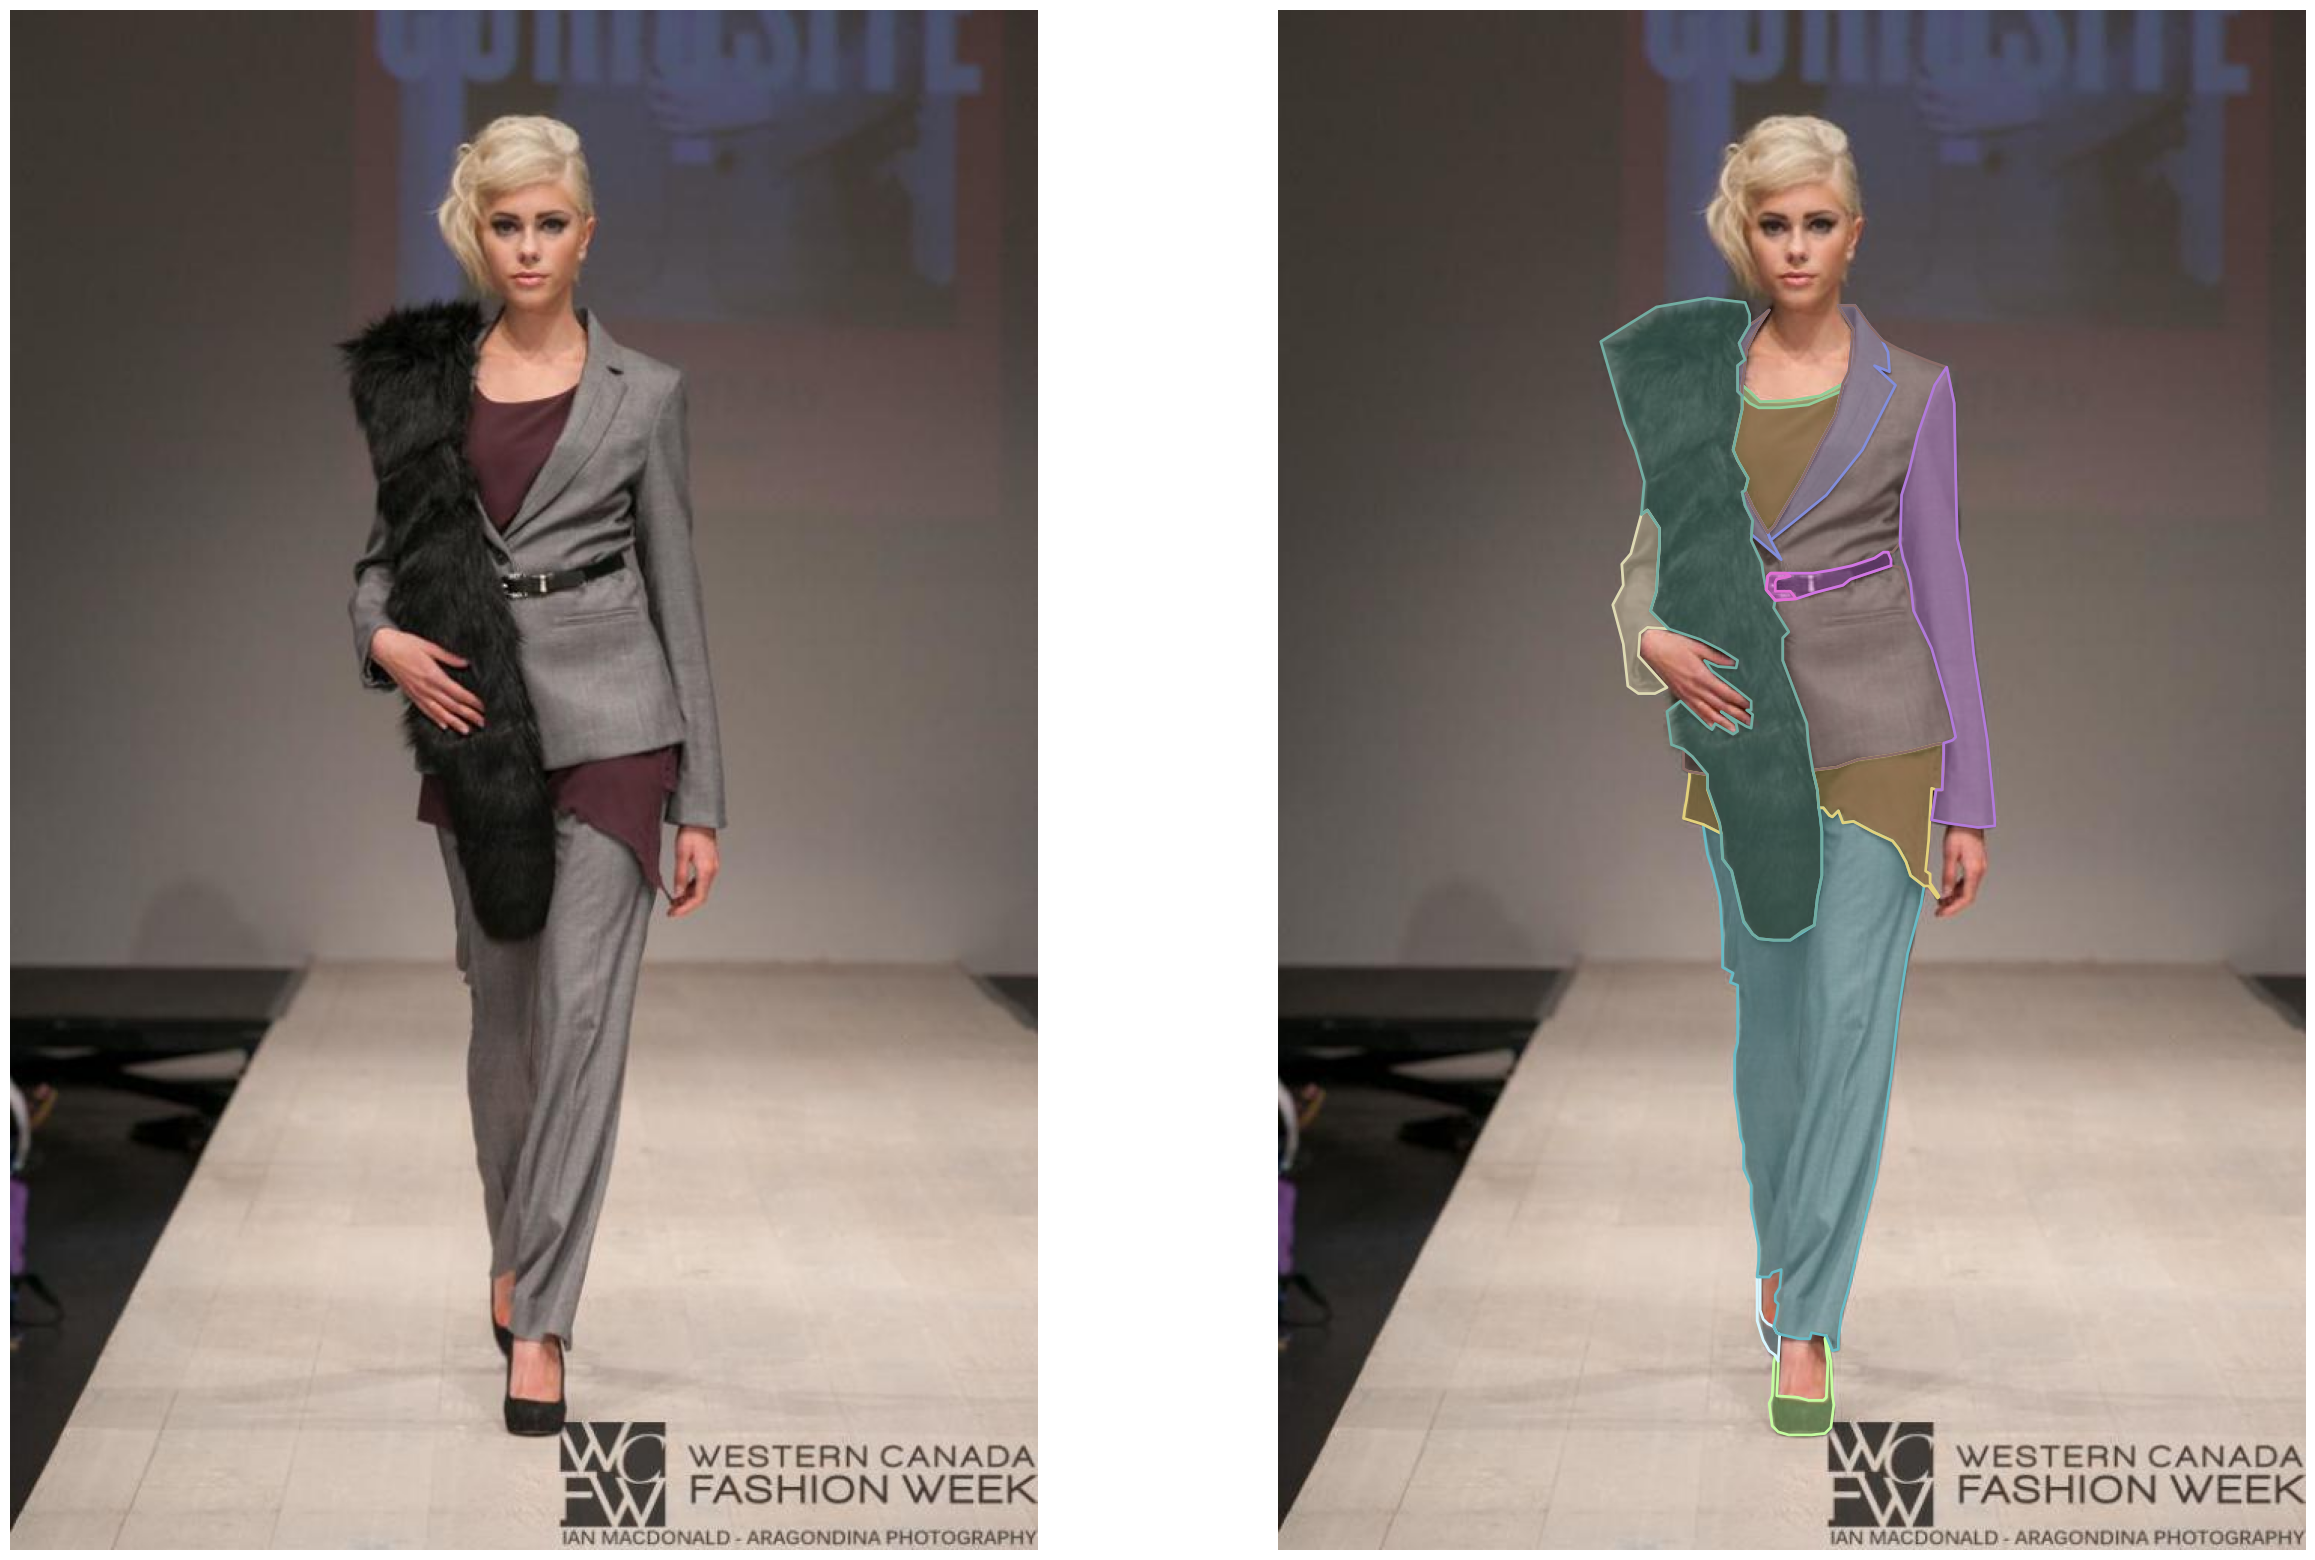

In [23]:
fp.visualize(selected, img_root)

### Note

The Fashionpedia does not own the copyright of the images. The users of the Fashionpedia accept full responsibility for the use of the Fashionpedia dataset, including but not limited to the use of any copies of copyrighted images that they may create from the Fashionpedia.
Check out our [Terms of Use](https://fashionpedia.github.io/home/data_license.html) for more details.